# 단순 선형회귀
* GradientTape 사용법

In [5]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [11]:
v = [1,2,3,4]
print(np.mean(v))
print(tf.reduce_mean(v))
print(tf.square(v))

2.5
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor([ 1  4  9 16], shape=(4,), dtype=int32)


In [12]:
w = np.array([[1,2],[3,4]])
w

array([[1, 2],
       [3, 4]])

In [14]:
tf.reduce_sum(w)  # 차원을 줄여서 더함, 10

<tf.Tensor: shape=(), dtype=int64, numpy=10>

In [16]:
# 단순선형회귀
# 임의 데이터 생성

X_data=[1,2,3,4,5]
y_data=[1,2,3,4,5]

# 가설 : y_hat = Wx + b
W = tf.Variable(2.0)  # 가중치 W 랜덤으로 초기화
b = tf.Variable(0.5)  # b 랜덤으로 초기화

In [17]:
y_hat = W * X_data + b   # 목표 W,b 값을 경사하강법으로 찾기

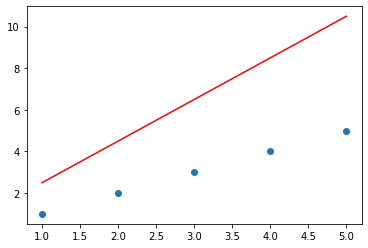

In [18]:
# 빨간 직선을 학습시키면 점점 점 쪽으로 이동
plt.plot(X_data,y_hat, 'r-')
plt.plot(X_data, y_data, 'o')

In [ ]:
# GradientTape 사용

lr = 0.01  # 학습률 설정

with tf.GradientTape() as tape:
  y_hat = W * X_data + b
  cost = tf.reduce_mean(tf.square(y_hat - y_data))   # MSE

W_grad, b_grad_b = tape.gradient(cost, [W,b])
W.assign_sub(lr * W_grad)  # W 갱신
b.assign_sub(lr * b_grad)  # b 갱신



In [23]:
W = tf.Variable(2.9)
b = tf.Variable(0.5)
lr = 0.01
EPOCH = 101


In [24]:
for i in range(EPOCH):
  with tf.GradientTape() as tape:
    y_hat = W * X_data + b  # 가설
    cost = tf.reduce_mean(tf.square(y_hat - y_data))   

  W_grad, b_grad = tape.gradient(cost, [W,b])
  W.assign_sub(lr * W_grad)  
  b.assign_sub(lr * b_grad) 

  if i % 10 == 0:
    print(f'W: {W.numpy()}, b: {b.numpy()}, cost:{cost}')


W: 2.452000141143799, b: 0.37599998712539673, cost:45.660003662109375
W: 1.1036423444747925, b: 0.0033982982859015465, cost:0.20633578300476074
W: 1.0128217935562134, b: -0.020914729684591293, cost:0.001026112586259842
W: 1.0065230131149292, b: -0.021844686940312386, cost:9.262979438062757e-05
W: 1.0059112310409546, b: -0.021226583048701286, cost:8.265224460046738e-05
W: 1.0056878328323364, b: -0.020527100190520287, cost:7.722109148744494e-05
W: 1.005496621131897, b: -0.019844047725200653, cost:7.216302037704736e-05
W: 1.005313515663147, b: -0.019183281809091568, cost:6.743684934917837e-05
W: 1.005136489868164, b: -0.018544474616646767, cost:6.30190916126594e-05
W: 1.0049654245376587, b: -0.017926912754774094, cost:5.889249223400839e-05
W: 1.0048000812530518, b: -0.017329951748251915, cost:5.503660213435069e-05


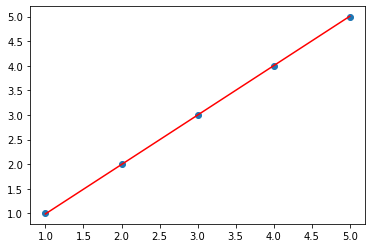

In [25]:
plt.plot(X_data,y_data, 'o')
plt.plot(X_data, y_hat.numpy(), 'r-')
plt.show()

In [30]:
X = [5.6,10,2.4]

y_hat = W * X + b  # 단순선형회귀 결

y_hat

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([ 5.60955  , 10.03067  ,  2.3941903], dtype=float32)>

## Optimizers


In [ ]:
# for i in range(EPOCH):
#   with tf.GradientTape() as tape:
#     y_hat = W * X_data + b  # 가설
#     cost = tf.reduce_mean(tf.square(y_hat - y_data))   # MSE

#   W_grad, b_grad = tape.gradient(cost, [W,b])
#   W.assign_sub(lr * W_grad)  # - optimize 부분 
#   b.assign_sub(lr * b_grad)  # - optimize 부분

#   if i % 10 == 0:
#     print(f'W: {W.numpy()}, b: {b.numpy()}, cost:{cost}')


In [32]:
# 임의 데이터 생성

X_data=[1,2,3,4,5]
y_data=[1,2,3,4,5]

W = tf.Variable(2.9)
b = tf.Variable(0.5)
lr = 0.01
EPOCH = 101


cost_func = tf.keras.losses.MeanSquaredError()   # MSE가 구현된 함수 사용
opt = tf.keras.optimizers.SGD()

In [36]:
for i in range(EPOCH):
  with tf.GradientTape() as tape:
    y_hat = W * X_data + b  # 가설
    cost = cost_func(y_data, y_hat)     # MSE 
    # cost = tf.reduce_mean(tf.square(y_hat - y_data))  # MSE


  grads = tape.gradient(cost, [W,b])
  opt.apply_gradients(zip(grads, [W,b])) 
  # W_grad, b_grad = tape.gradient(cost, [W,b])
  # W.assign_sub(lr * W_grad) 
  # b.assign_sub(lr * b_grad) 


  if i % 10 == 0:
    print(f'W: {W.numpy()}, b: {b.numpy()}, cost:{cost}')


W: 2.452000141143799, b: 0.37599998712539673, cost:45.660003662109375
W: 1.1036423444747925, b: 0.0033982964232563972, cost:0.20633578300476074
W: 1.0128217935562134, b: -0.020914729684591293, cost:0.001026112586259842
W: 1.0065230131149292, b: -0.021844686940312386, cost:9.262979438062757e-05
W: 1.0059112310409546, b: -0.021226583048701286, cost:8.265224460046738e-05
W: 1.0056878328323364, b: -0.020527100190520287, cost:7.722109148744494e-05
W: 1.005496621131897, b: -0.019844047725200653, cost:7.216302037704736e-05
W: 1.005313515663147, b: -0.019183281809091568, cost:6.743684934917837e-05
W: 1.005136489868164, b: -0.018544474616646767, cost:6.30190916126594e-05
W: 1.0049654245376587, b: -0.017926912754774094, cost:5.889249223400839e-05
W: 1.0048000812530518, b: -0.017329951748251915, cost:5.503660213435069e-05
